In [2]:
import os
import shutil
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [3]:
save_dirs = []
with open('../data/save_dirs.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        save_dirs.append(row[1])
save_dirs = np.array(save_dirs)[1:]

In [4]:
# Keep only the successful runs
for save_dir in save_dirs:
    if len(os.listdir(save_dir)) != 6:
        # drop save_dir from array
        save_dirs = save_dirs[save_dirs != save_dir]
len(save_dirs)

9

In [5]:
# split each save_dir to obtain count id and exp id
cont_ids = []
exp_ids = []
for i in range(len(save_dirs)):
    cont_ids.append(save_dirs[i].split('cont_')[1].split('_exp')[0])
    exp_ids.append(save_dirs[i].split('exp_')[1].split('_VISp')[0])
cont_ids = np.array(cont_ids)
exp_ids = np.array(exp_ids)

In [6]:
# retrieve meta data for each container (contains layer info)
subset_exp_cont_df = pd.read_csv('../data/subset_exp_cont_df.csv', dtype=str)
# filter out the entries where the id is not in cont_ids
subset_exp_cont_df = subset_exp_cont_df[subset_exp_cont_df['id'].isin(
    cont_ids)]
subset_exp_cont_df = subset_exp_cont_df.reset_index(drop=True)
subset_exp_cont_df

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,layer
0,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False,23
1,603425700,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),323984,Ntsr1-Cre_GN220;Ai148-323984,[],False,6
2,614418789,375,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),332396,Sst-IRES-Cre;Ai148(CAM)-332396,[],False,5
3,573720506,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297620,Sst-IRES-Cre;Ai148(CAM)-297620,[],False,4
4,511510675,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),228786,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786,[],False,4
5,529763300,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),250605,Nr5a1-Cre;Camk2a-tTA;Ai93-250605,[],False,4
6,511507811,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),221470,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-221470,[],False,4
7,637998953,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),339839,Fezf2-CreER;Ai148-339839,[],False,5
8,616886391,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),335660,Fezf2-CreER;Ai148(CAM)-335660,[],False,5


In [7]:
# add column for exp_id, save_dir
subset_exp_cont_df['exp_id'] = exp_ids
subset_exp_cont_df['save_dir'] = save_dirs
subset_exp_cont_df

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,layer,exp_id,save_dir
0,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False,23,662351346,../data/cont_661437138_exp_662351346_VISp_L23/
1,603425700,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),323984,Ntsr1-Cre_GN220;Ai148-323984,[],False,6,603516552,../data/cont_603425700_exp_603516552_VISp_L6/
2,614418789,375,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),332396,Sst-IRES-Cre;Ai148(CAM)-332396,[],False,5,614535829,../data/cont_614418789_exp_614535829_VISp_L5/
3,573720506,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297620,Sst-IRES-Cre;Ai148(CAM)-297620,[],False,4,574415929,../data/cont_573720506_exp_574415929_VISp_L4/
4,511510675,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),228786,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786,[],False,4,509962140,../data/cont_511510675_exp_509962140_VISp_L4/
5,529763300,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),250605,Nr5a1-Cre;Camk2a-tTA;Ai93-250605,[],False,4,529763302,../data/cont_529763300_exp_529763302_VISp_L4/
6,511507811,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),221470,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-221470,[],False,4,500860585,../data/cont_511507811_exp_500860585_VISp_L4/
7,637998953,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),339839,Fezf2-CreER;Ai148-339839,[],False,5,638754323,../data/cont_637998953_exp_638754323_VISp_L5/
8,616886391,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),335660,Fezf2-CreER;Ai148(CAM)-335660,[],False,5,636930038,../data/cont_616886391_exp_636930038_VISp_L5/


In [8]:
layers = np.unique(subset_exp_cont_df['layer'])
layers

array(['23', '4', '5', '6'], dtype=object)

In [9]:
# stratify the data by unique layer values
metadata_layer_dict = {}
for layer in layers:
    metadata_layer_dict[layer] = subset_exp_cont_df[subset_exp_cont_df['layer'] == layer]

In [10]:
dff_layer_dict = {}
# for each layer...
for layer in layers:
    dff_layer_dict[layer] = {}
    # retrieve the container ids and experiment ids
    cont_ids_layer = np.array(metadata_layer_dict[layer]['id'])
    exp_ids_layer = np.array(metadata_layer_dict[layer]['exp_id'])
    save_dirs_layer = np.array(metadata_layer_dict[layer]['save_dir'])
    # for each experiment...
    one_std_df = pd.DataFrame()
    two_std_df = pd.DataFrame()
    for save_dir_layer in save_dirs_layer:
        # retrieve one_std_linear.csv and two_std_linear.csv
        one_std_linear = pd.read_csv(save_dir_layer + 'one_std_linear.csv', dtype=str)
        two_std_linear = pd.read_csv(save_dir_layer + 'two_std_linear.csv', dtype=str)
        # append to one_std_df and two_std_df
        one_std_df = one_std_df.append(one_std_linear)
        two_std_df = two_std_df.append(two_std_linear)
    # add to dff_layer_dict
    dff_layer_dict[layer]['one_std'] = one_std_df
    dff_layer_dict[layer]['two_std'] = two_std_df

In [11]:
dff_layer_dict['23']['one_std']

,cell_specimen_id,ori_peak_sig,freq_peak_sig
0,673033497,2.3179714623362977,1.7655220577376642
1,673033469,1.826235613209055,1.5004937813741943
2,673033254,1.5787915910141364,1.2800906947251822
3,673031533,1.5476576624475062,1.3226879605815884
4,673033184,1.5295679547658234,1.2361592057004511
5,673033177,1.3978967709983423,1.3159864419653593
6,673033247,1.3864336350457889,1.4695216925400452
7,673031987,1.3724746914096464,1.2438403200121038
8,673033455,1.3601463418357986,1.359555263202686


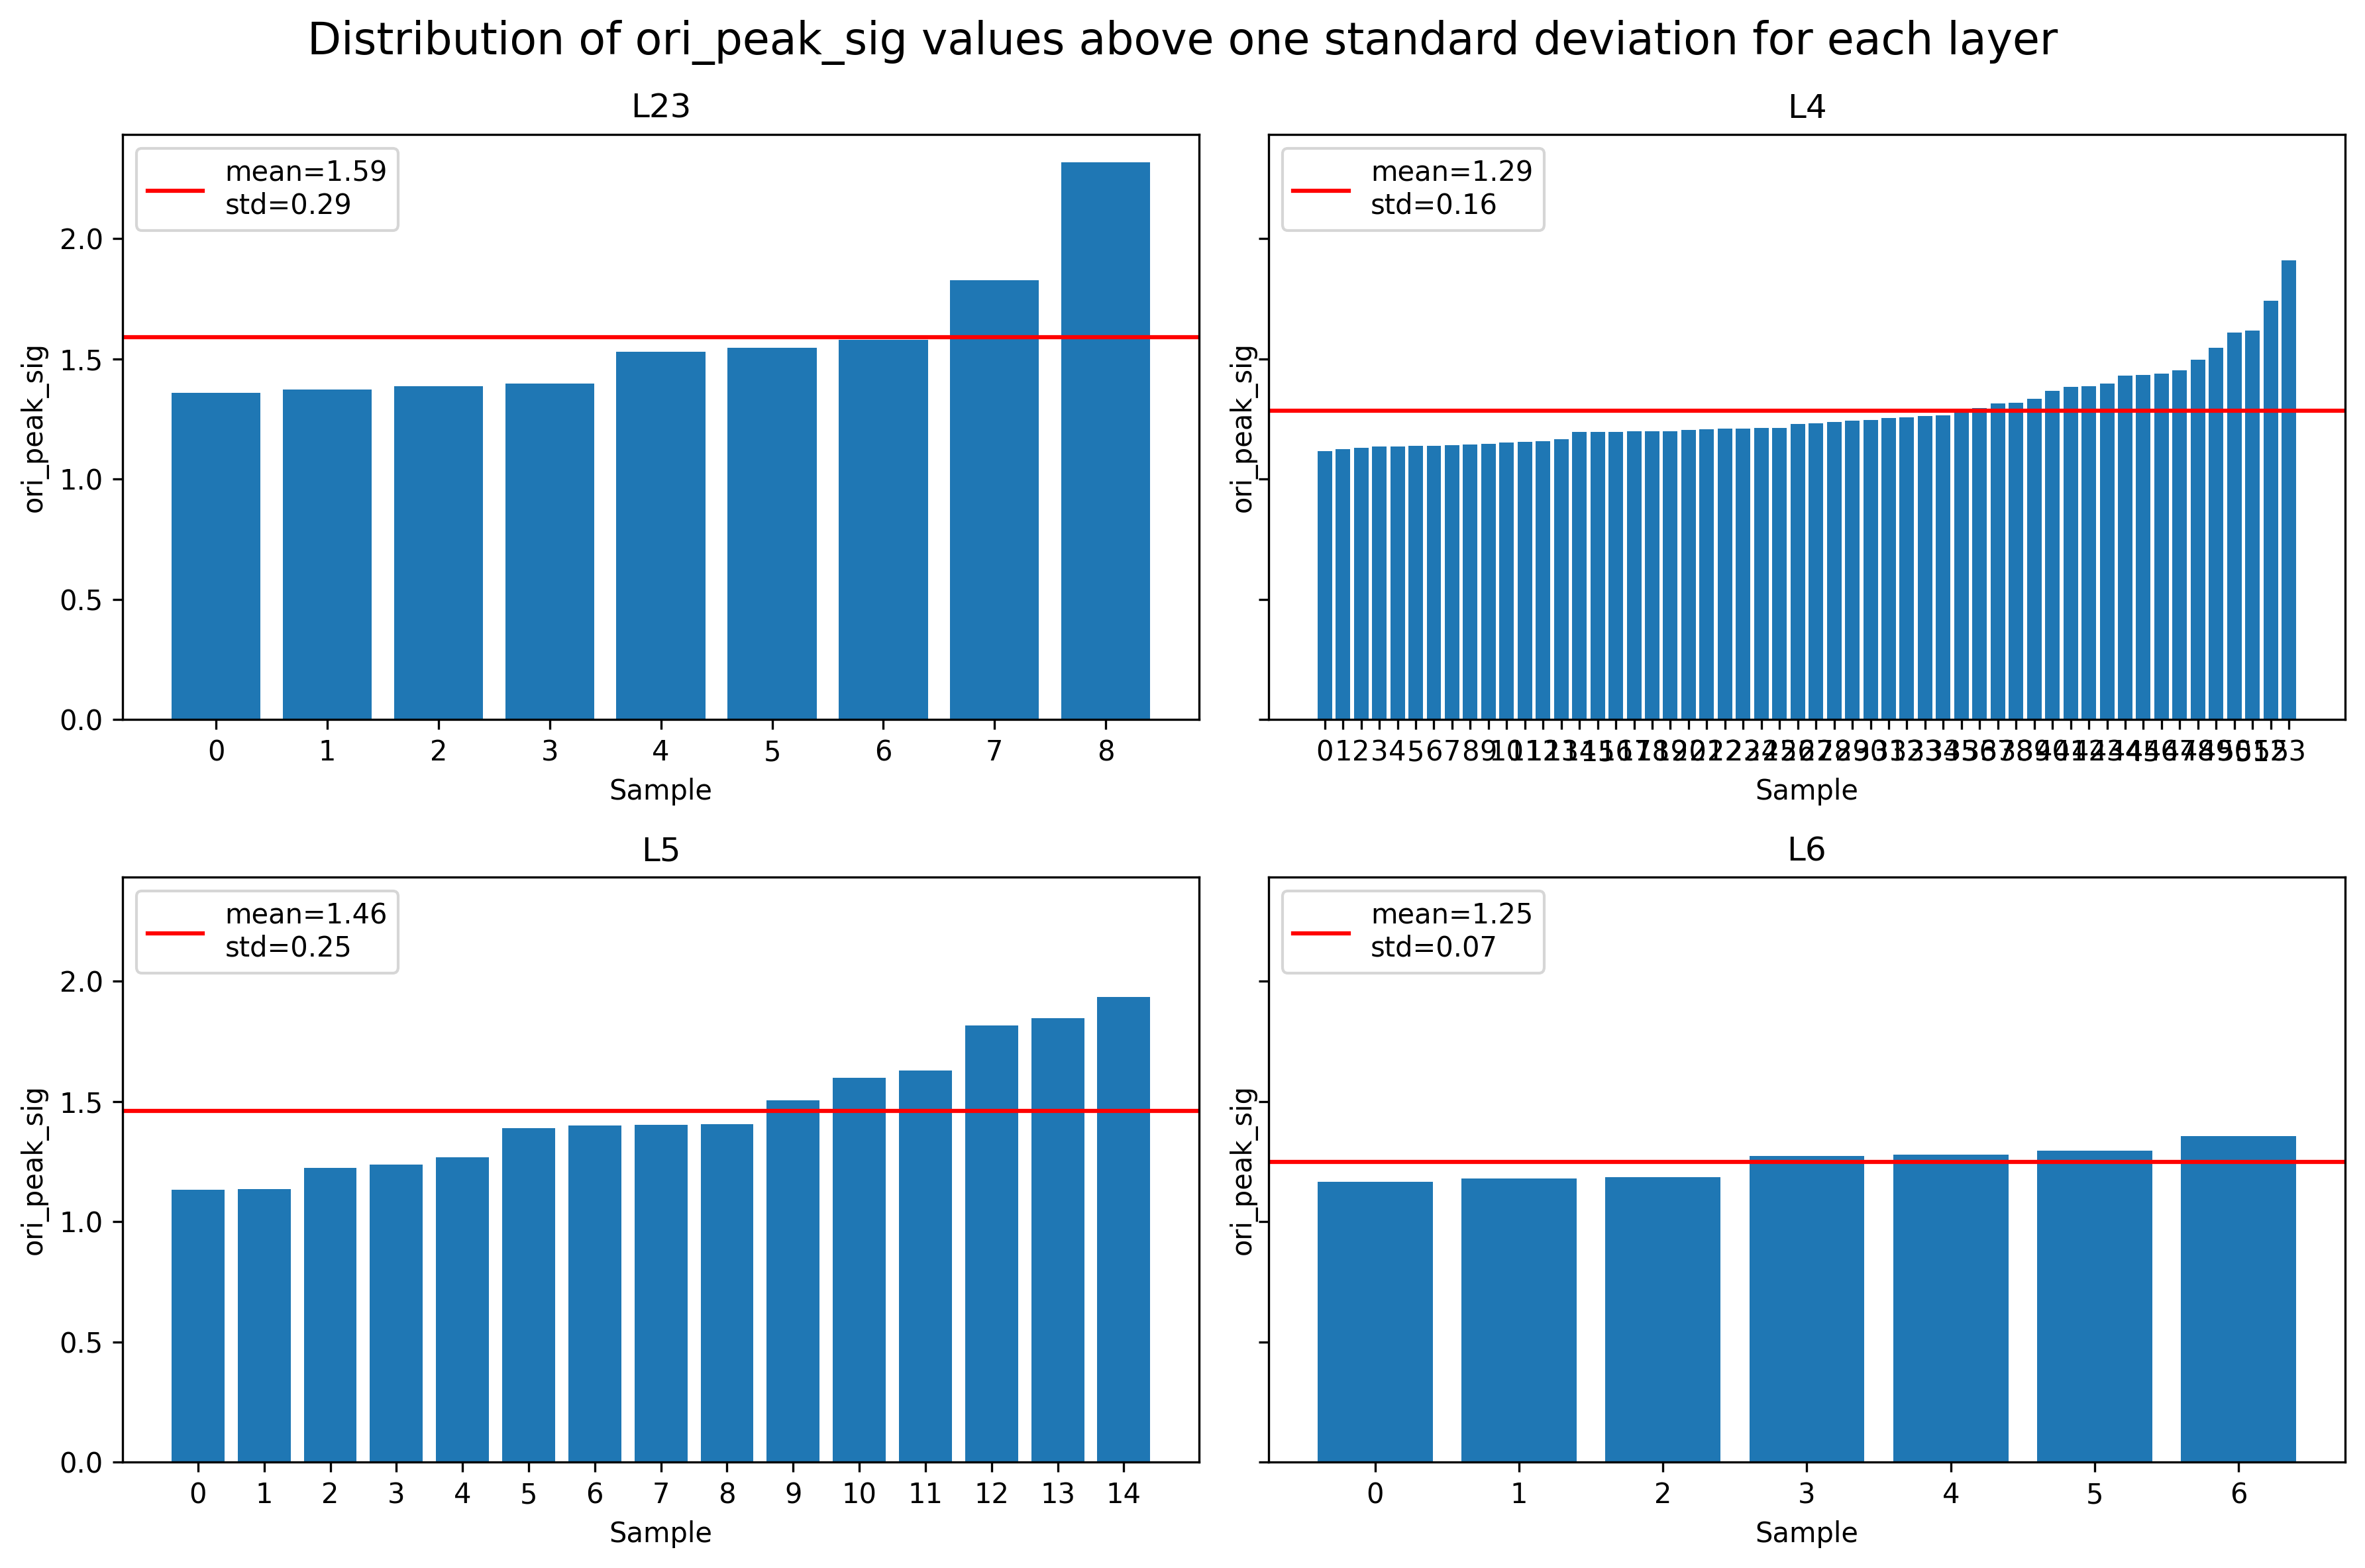

In [13]:
# Create a figure with subplots
fig, axs = plt.subplots(2,2, figsize=(12, 8), dpi=300, sharey=True)

# Iterate over each layer and plot the distribution of ori_peak_sig values
for i, layer in enumerate(layers):
    # Calculate the subplot position
    row = i // 2
    col = i % 2
    
    # Select the subplot
    ax = axs[row, col]

    # get data
    one_std = dff_layer_dict[layer]['one_std'].sort_values(by=['ori_peak_sig'])
    # two_std = dff_layer_dict[layer]['two_std'].sort_values(by=['ori_peak_sig'])
    
    # Plot the distribution
    x = np.arange(len(one_std['ori_peak_sig']))
    y = np.array(one_std['ori_peak_sig']).astype(float)
    ax.bar(x, y)
    ax.set_title('L' + layer)
    ax.axhline(y=y.mean(), color='r', linestyle='-', label='mean=' + str(round(y.mean(), 2)) + '\nstd=' + str(round(y.std(), 2)))
    ax.legend(loc='upper left')
    ax.set_xlabel('Sample')
    ax.set_ylabel('ori_peak_sig')
    ax.set_xticks(x)
    ax.set_xticklabels(x)

# add title with line break
plt.suptitle(
    'Distribution of ori_peak_sig values above one standard deviation for each layer', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# save the figure
plt.savefig('../figures/ori_peak_sig_by_layer_bar.png')

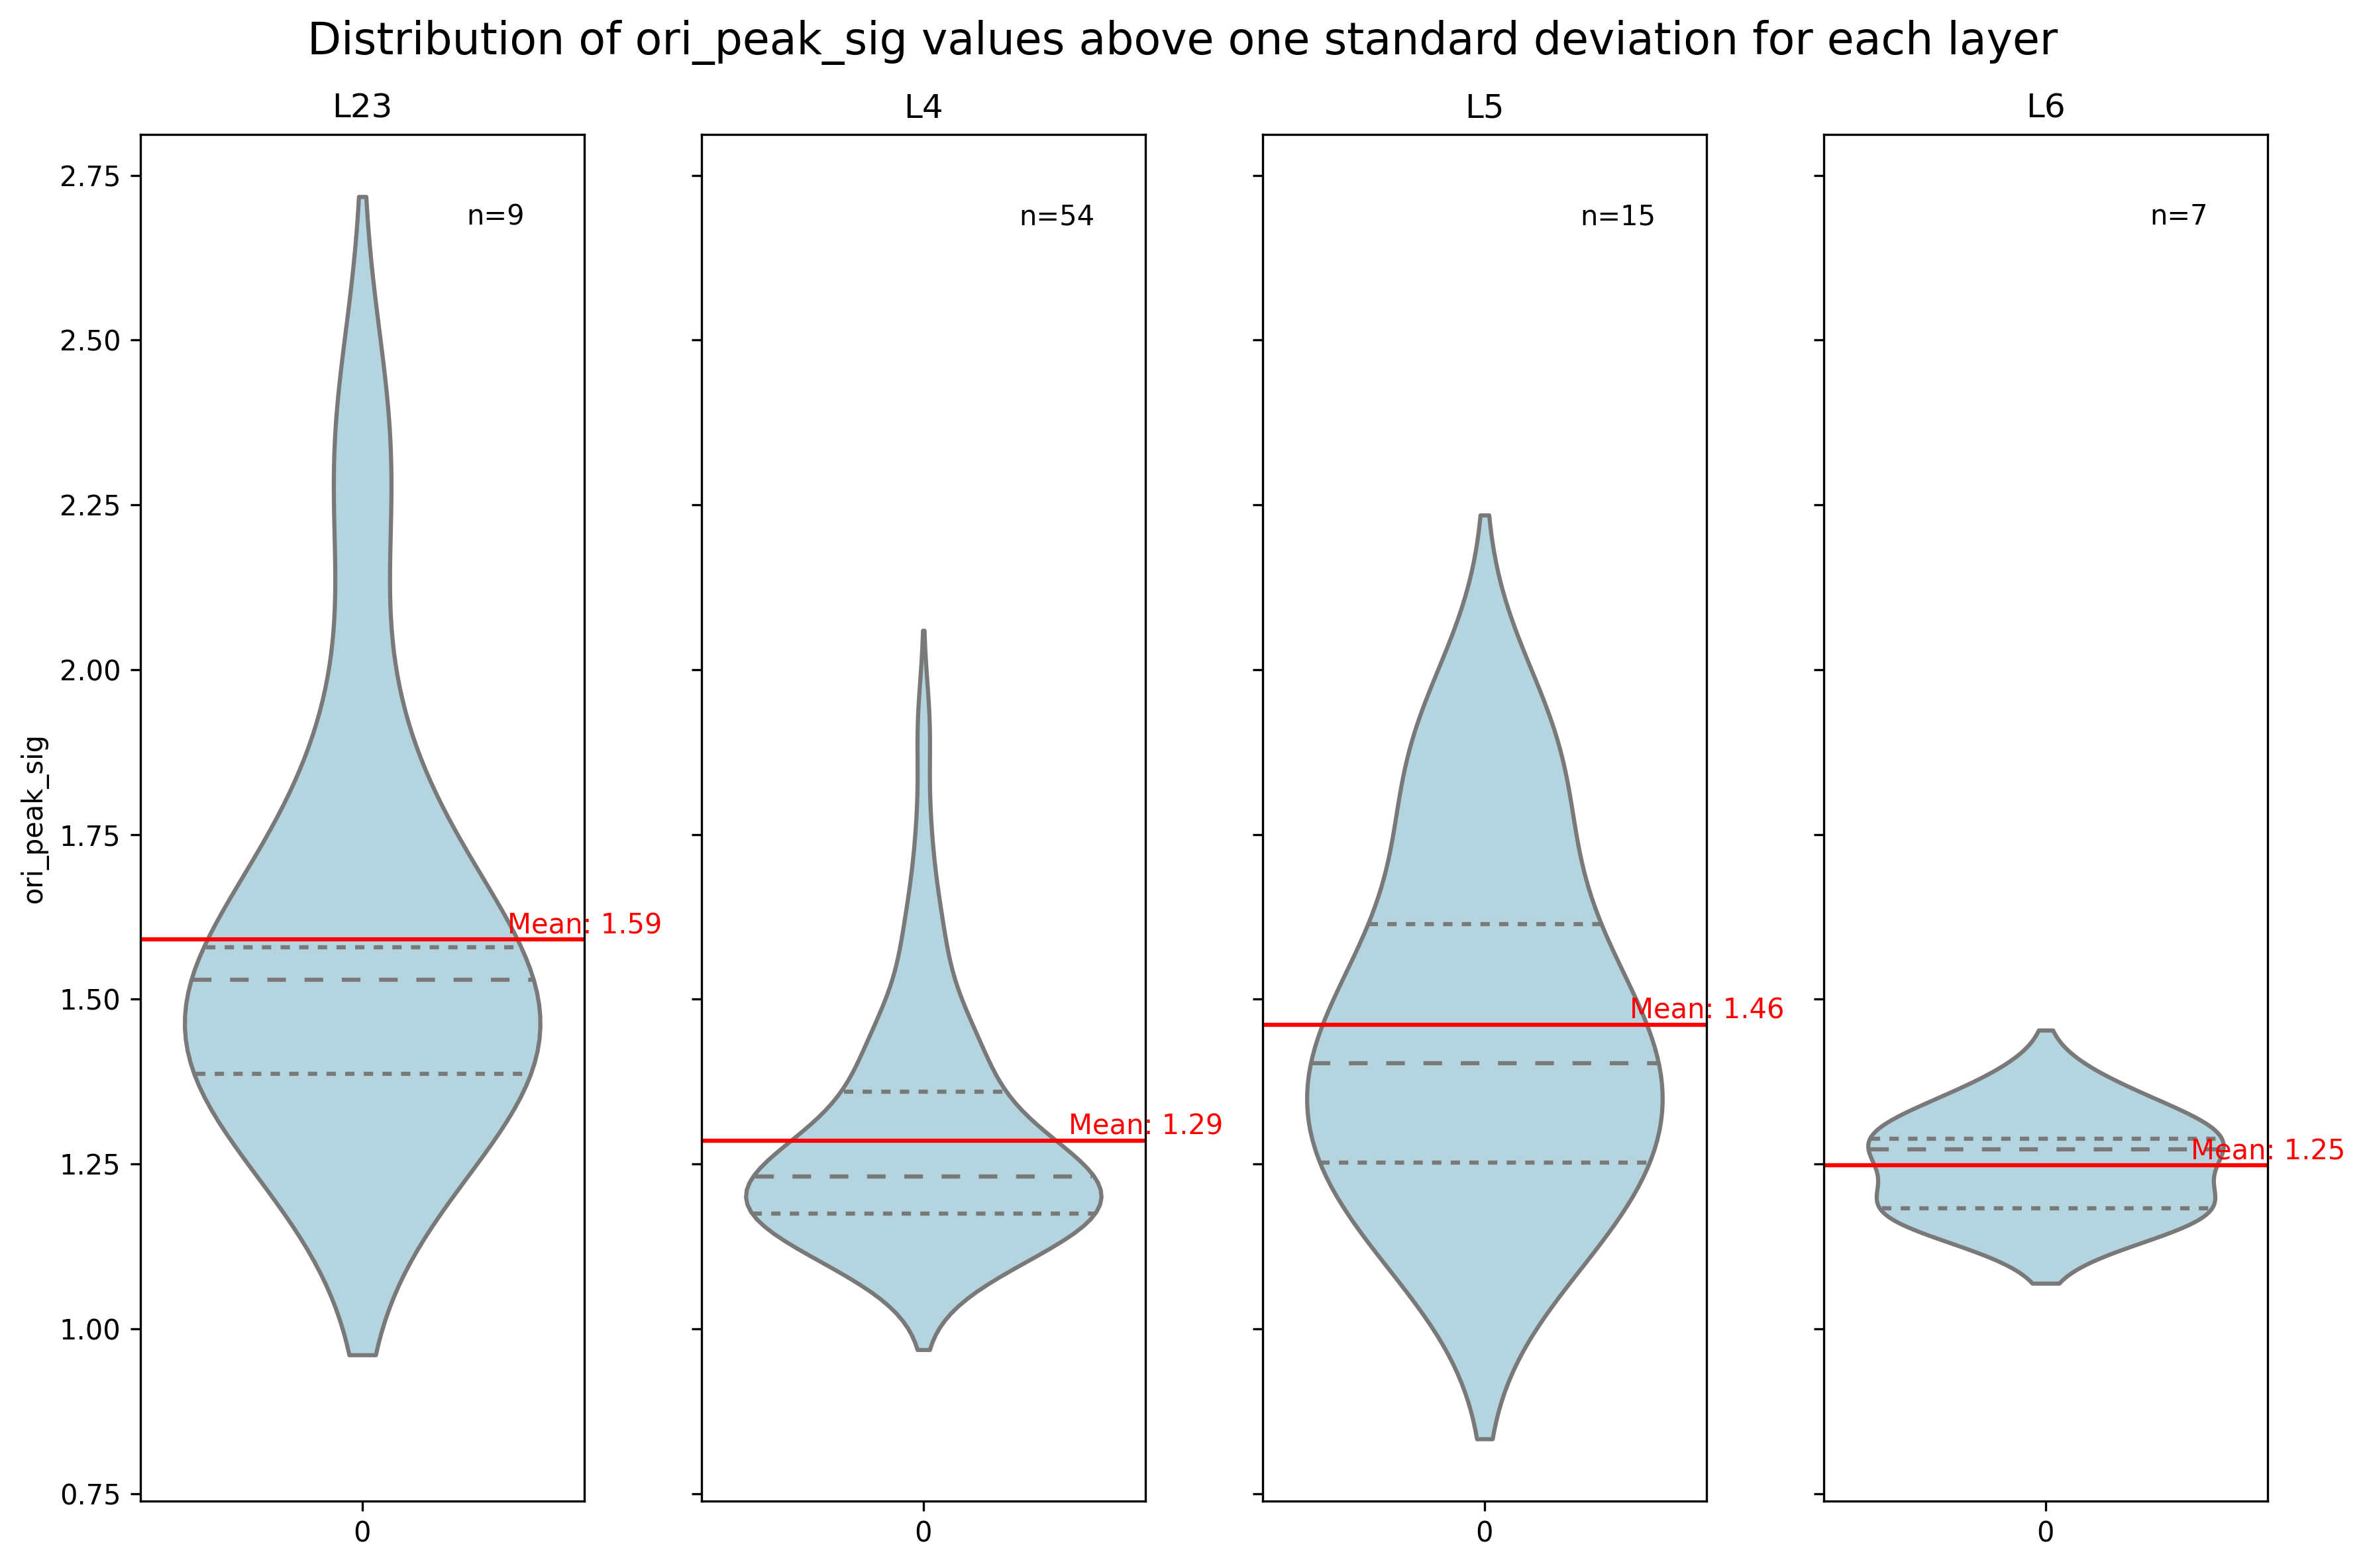

In [14]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 8), dpi=300, sharey=True)

# Iterate over each layer and plot the distribution of ori_peak_sig values
for i, layer in enumerate(layers):
    # Calculate the subplot position
    col = i 

    # Select the subplot
    ax = axs[col]

    # Get data
    one_std = dff_layer_dict[layer]['one_std'].sort_values(by=['ori_peak_sig'])

    # Plot the distribution using violin plots
    sns.violinplot(data=np.array(one_std['ori_peak_sig']), ax=ax, inner='quartile', orient='v', color='lightblue')

    # Calculate the mean
    mean_value = np.mean(np.array(one_std['ori_peak_sig'], dtype=float))

    # Draw a red line at the mean position
    ax.axhline(mean_value, color='red', linestyle='-', label='Mean')

    # Label the mean value
    ax.text(0.5, mean_value, f'Mean: {mean_value:.2f}', color='red', ha='center', va='bottom')

    # label sample size
    ax.text(0.8, 0.95, f'n={len(one_std)}', color='black', ha='center', va='top', transform=ax.transAxes)
    
    ax.set_title('L' + layer)

axs[0].set_ylabel('ori_peak_sig')

# Add title with line break
plt.suptitle(
    'Distribution of ori_peak_sig values above one standard deviation for each layer', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# save the figure
plt.savefig('../figures/ori_peak_sig_by_layer_violin.png')

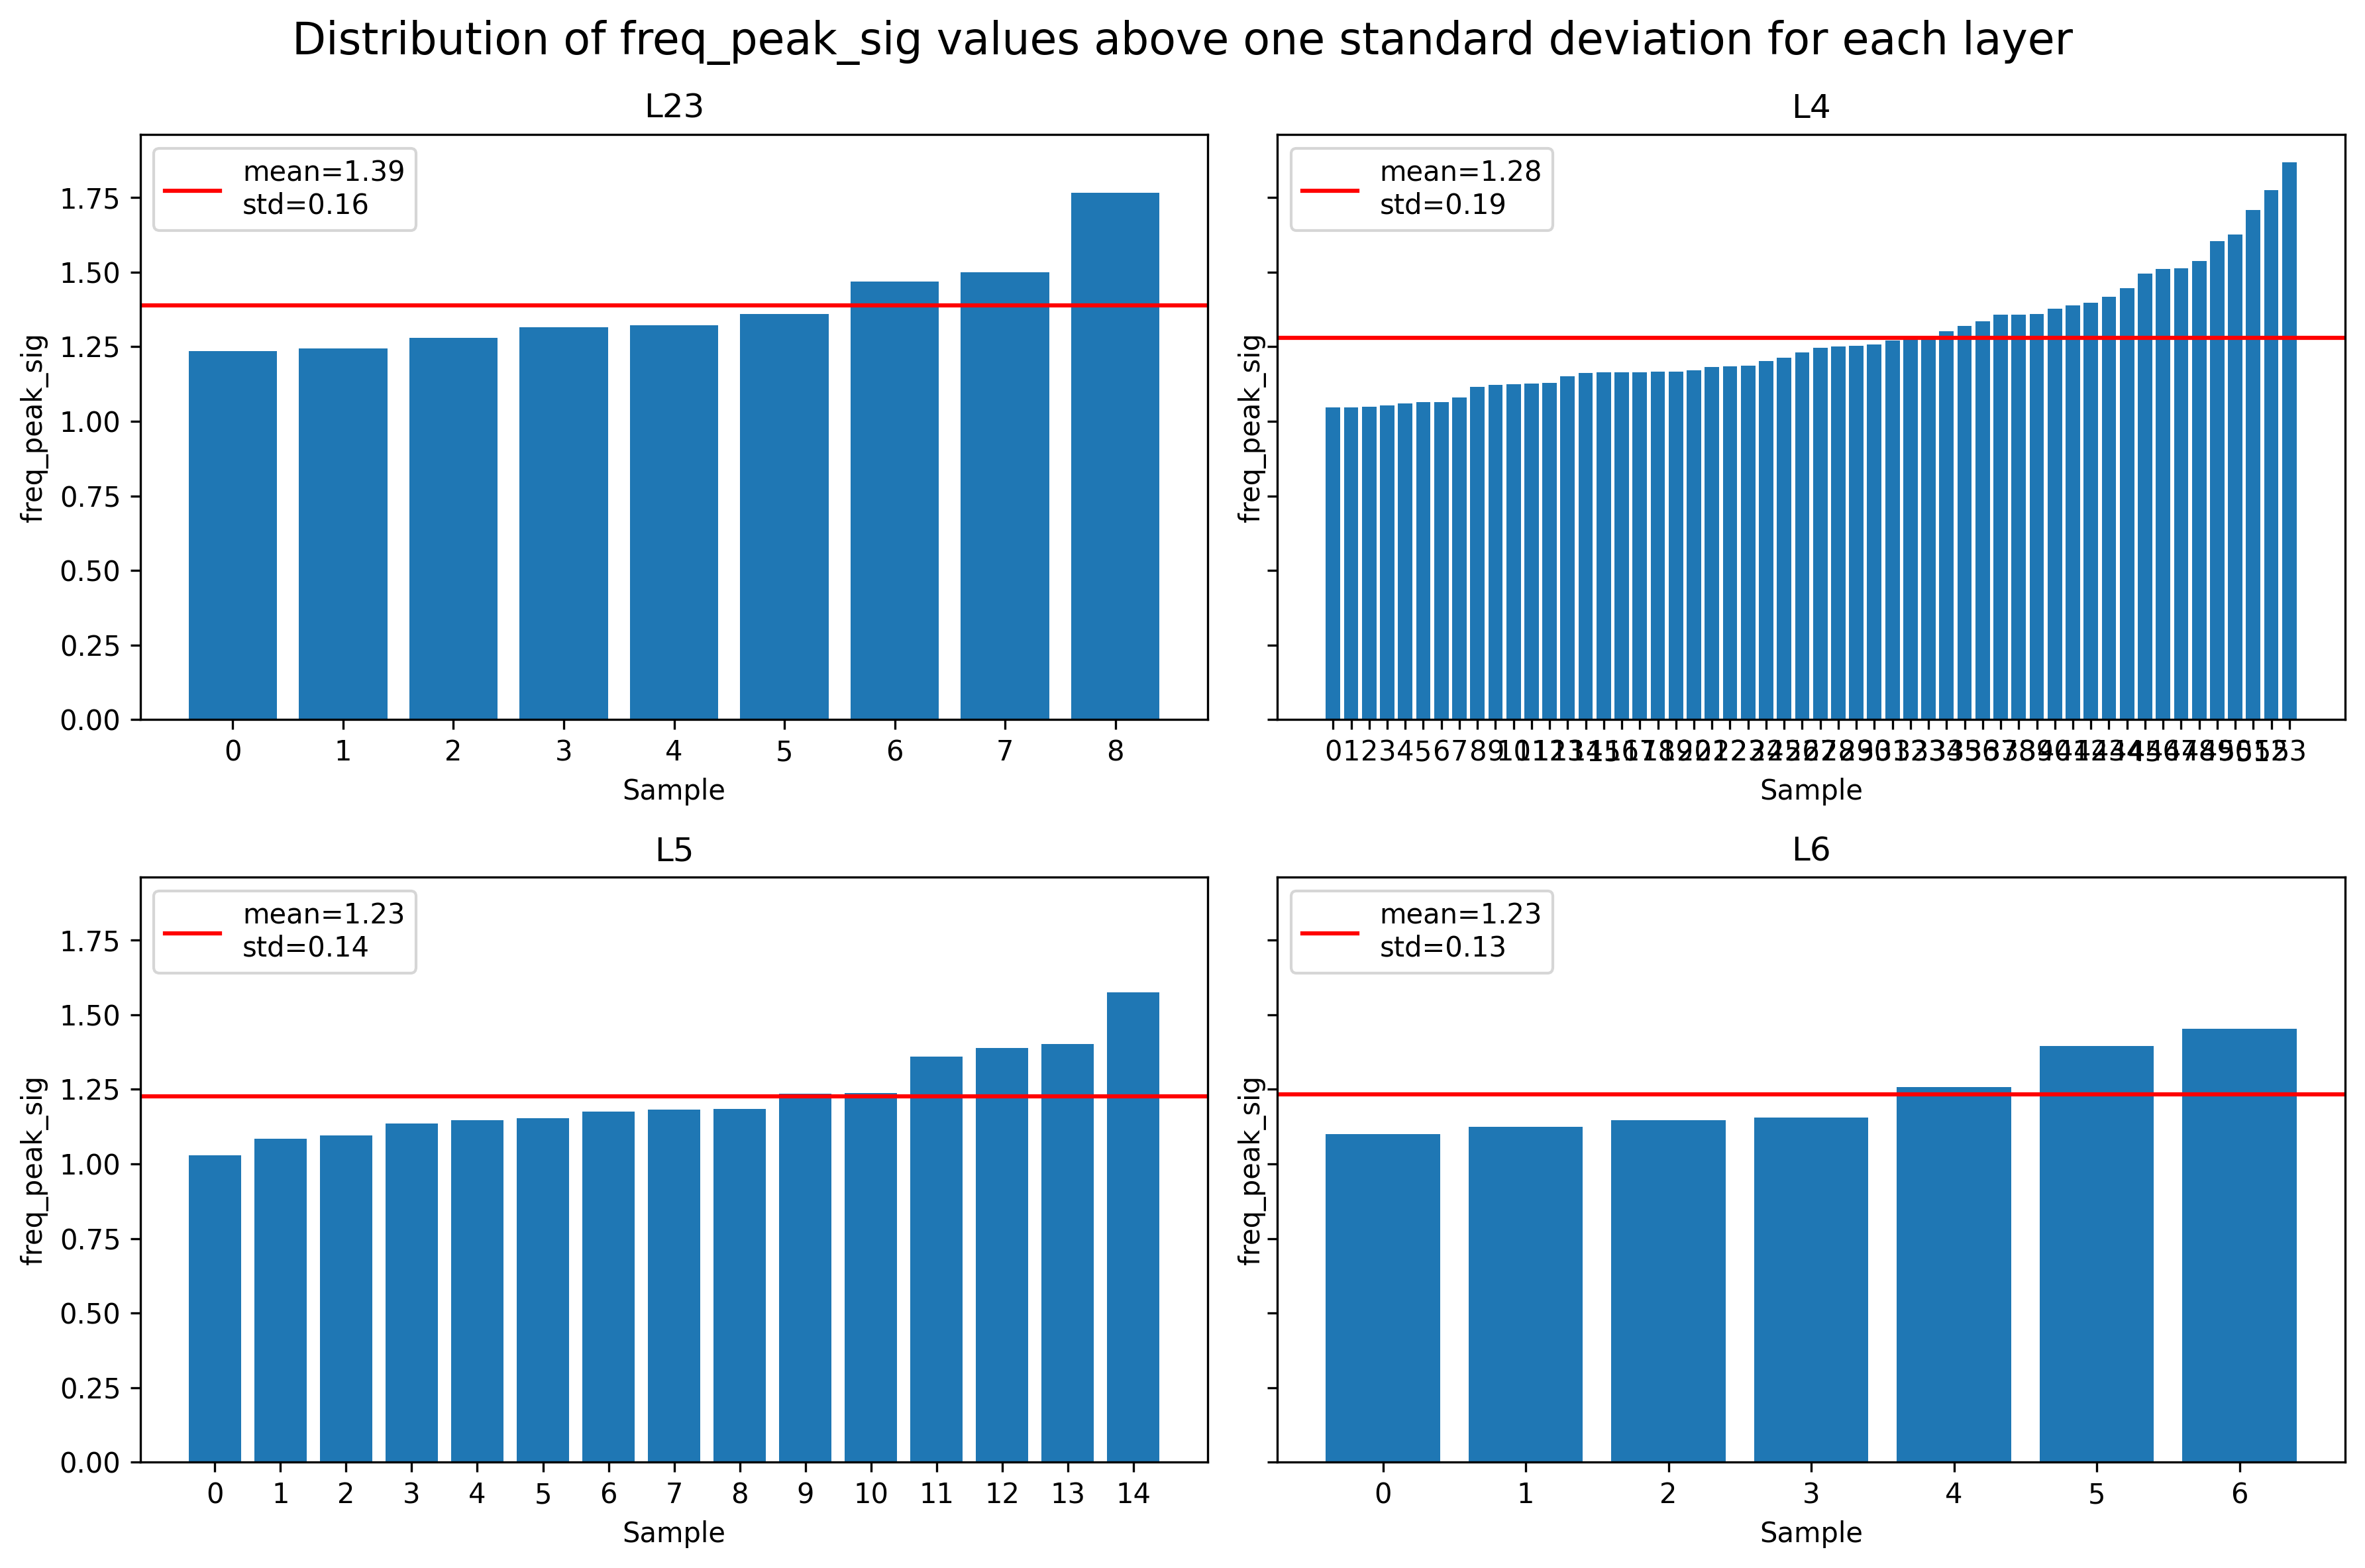

In [15]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300, sharey=True)

# Iterate over each layer and plot the distribution of freq_peak_sig values
for i, layer in enumerate(layers):
    # Calculate the subplot position
    row = i // 2
    col = i % 2

    # Select the subplot
    ax = axs[row, col]

    # Get data
    one_std = dff_layer_dict[layer]['one_std'].sort_values(by=['freq_peak_sig'])
    # two_std = dff_layer_dict[layer]['two_std'].sort_values(by=['freq_peak_sig'])

    # Plot the distribution
    x = np.arange(len(one_std['freq_peak_sig']))
    y = np.array(one_std['freq_peak_sig']).astype(float)
    ax.bar(x, y)
    ax.set_title('L' + layer)
    ax.axhline(y=y.mean(), color='r', linestyle='-', label='mean=' +
               str(round(y.mean(), 2)) + '\nstd=' + str(round(y.std(), 2)))
    ax.legend(loc='upper left')
    ax.set_xlabel('Sample')
    ax.set_ylabel('freq_peak_sig')
    ax.set_xticks(x)
    ax.set_xticklabels(x)

# Add title with line break
plt.suptitle(
    'Distribution of freq_peak_sig values above one standard deviation for each layer', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# save the figure
plt.savefig('../figures/freq_peak_sig_by_layer_bar.png')

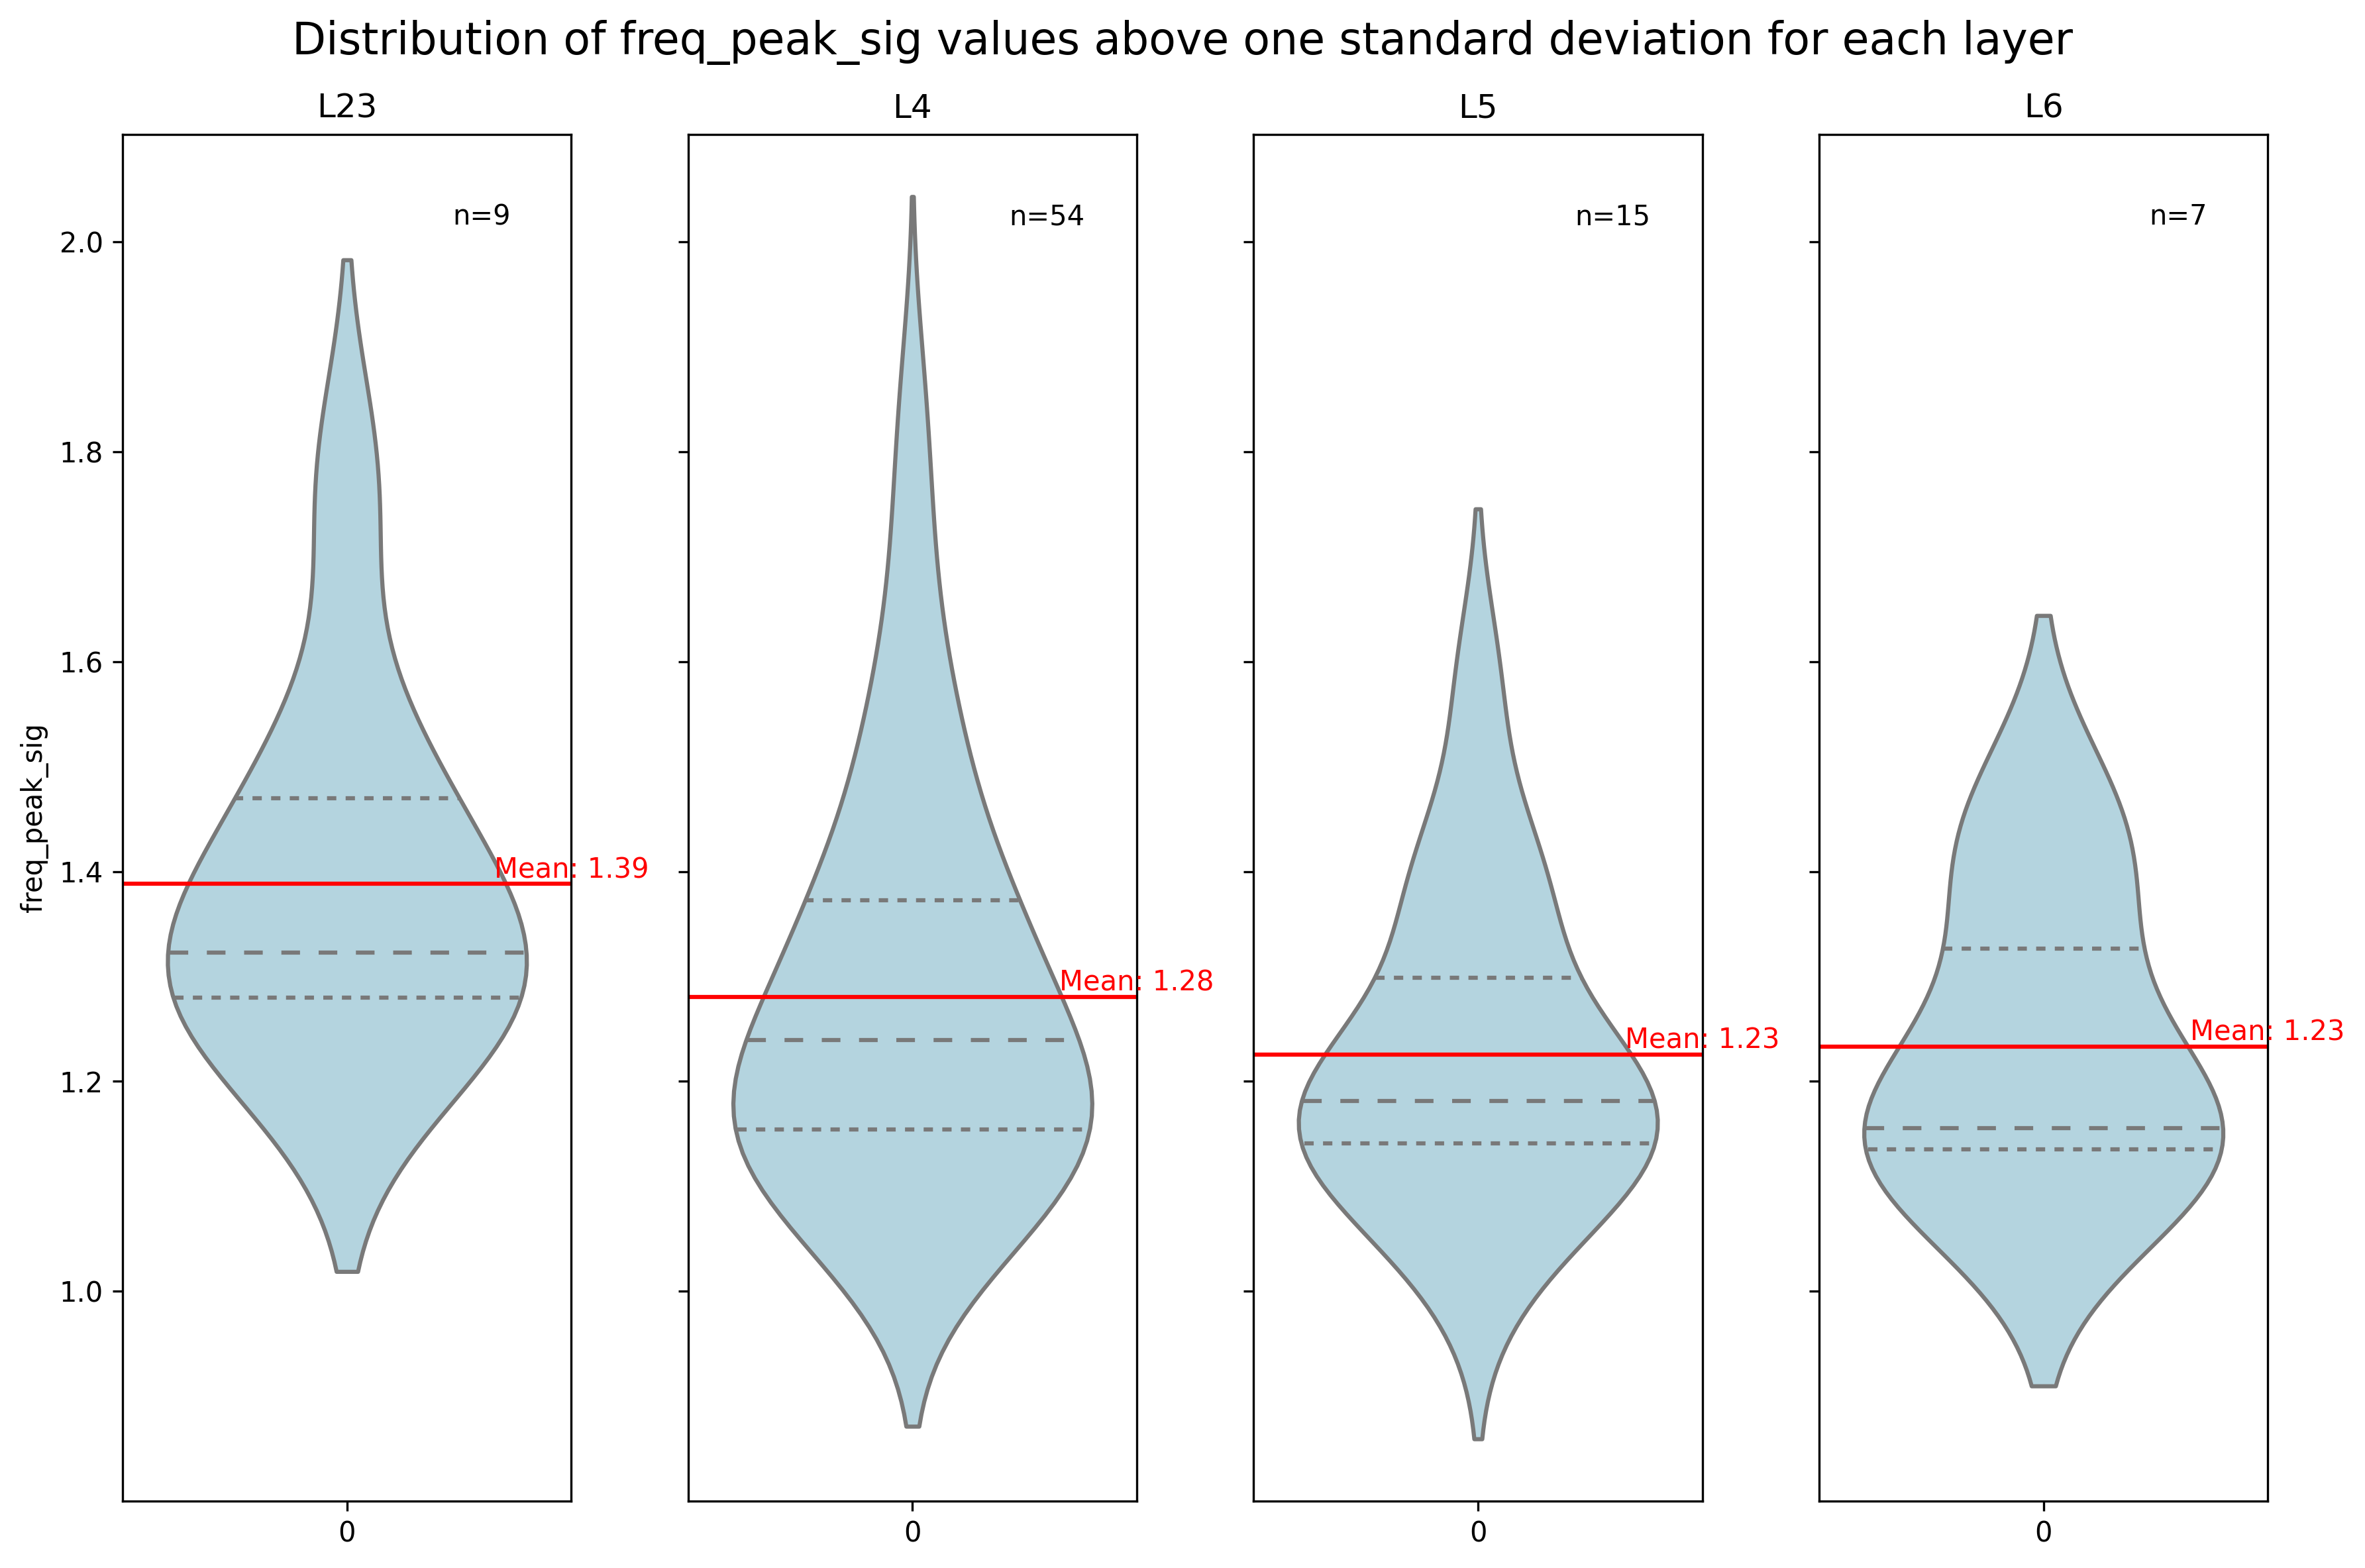

In [16]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 8), dpi=300, sharey=True)

# Iterate over each layer and plot the distribution of freq_peak_sig values
for i, layer in enumerate(layers):
    # Calculate the subplot position
    col = i

    # Select the subplot
    ax = axs[col]

    # Get data
    one_std = dff_layer_dict[layer]['one_std'].sort_values(
        by=['freq_peak_sig'])

    # Plot the distribution using violin plots
    sns.violinplot(data=np.array(
        one_std['freq_peak_sig']), ax=ax, inner='quartile', orient='v', color='lightblue')

    # Calculate the mean
    mean_value = np.mean(np.array(one_std['freq_peak_sig'], dtype=float))

    # Draw a red line at the mean position
    ax.axhline(mean_value, color='red', linestyle='-', label='Mean')

    # Label the mean value
    ax.text(0.5, mean_value, f'Mean: {mean_value:.2f}',
            color='red', ha='center', va='bottom')

    # label sample size
    ax.text(0.8, 0.95, f'n={len(one_std)}', color='black',
            ha='center', va='top', transform=ax.transAxes)


    ax.set_title('L' + layer)

axs[0].set_ylabel('freq_peak_sig')

# Add title with line break
plt.suptitle(
    'Distribution of freq_peak_sig values above one standard deviation for each layer', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# save the figure
plt.savefig('../figures/freq_peak_sig_by_layer_violin.png')